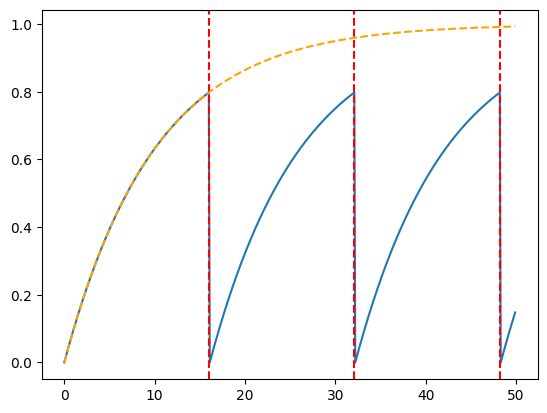

In [151]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''
G = NeuronGroup(1, eqs, threshold='v>0.8', reset="v = 0", method="exact")
M = StateMonitor(G, True, True)
S = SpikeMonitor(G)
run(50*ms)

# M.t is in seconds, so we convert to ms
# note to stupid: M.t is just the time axis to plot v against lmao
plot(M.t/ms, M.v[0]);

for s in S.t:
    plt.axvline(s/ms, color="red", ls="--")

# solving dv/dt = (1-v)/tau, we get v = 1 - exp(t/tau)
plot(M.t/ms, 1-exp(-M.t/tau), '--', color="orange");
# thus, the result we get by running the sim matches what we get when solving it analytically.

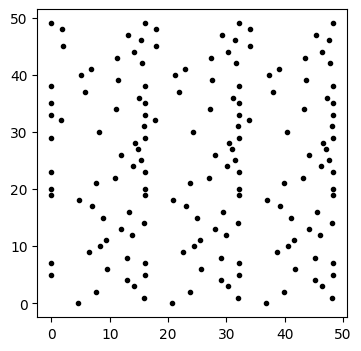

In [152]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''
G = NeuronGroup(50, eqs, threshold='v>0.8', reset="v = 0", method="exact")
G.v = 'rand()'
M = StateMonitor(G, True, True)
S = SpikeMonitor(G)

run(50*ms)
plt.figure(figsize=(4, 4)) 
plot(S.t/ms, S.i, ".k");

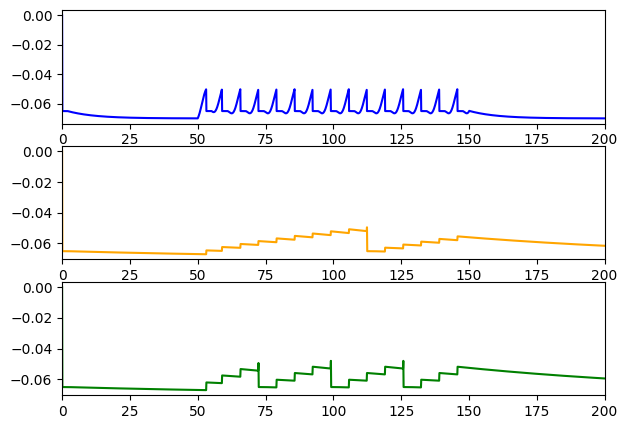

In [241]:
from neurodynex3.tools import input_factory, plot_tools

start_scope()

v_rest = -70 * mV
v_reset = -65 * mV
threshold = -50 * mV
membrane_r = 10. * Mohm
refractory = 2.0 * ms
run_time = 200*ms

curr = input_factory.get_sinusoidal_current(
        500, 1500, unit_time=0.1 * ms,
        amplitude=2.5 * namp, frequency=150 * Hz, direct_current=2. * namp)

eqs = '''
dv/dt = ( -(v - v_rest) + membrane_r * curr(t, 0) * I ) / tau : volt (unless refractory)
I : 1
tau : second
'''
G = NeuronGroup(
3, eqs, threshold='v > threshold', 
reset="v = v_reset", method="linear", refractory=refractory)
G.I = [2, 0, 0]
G.tau = [10, 100, 100]*ms

S = Synapses(G, G, 'w : 1', on_pre="v_post += w * mV")
S.connect(i=0, j=[1, 2])
S.w = 'j*2.5'
# S.delay = 'j*2*ms'

M = StateMonitor(G, 'v', record=True)

run(run_time)

fig, axes = plt.subplots(3, 1, figsize=(7, 5))

colors = ["blue", "orange", "green"]
i = 0
for ax in axes:
    ax.plot(M.t/ms, M.v[i], label='Neuron 0', color=colors[i])
    ax.set_xlim(0, run_time/ms)
    i += 1

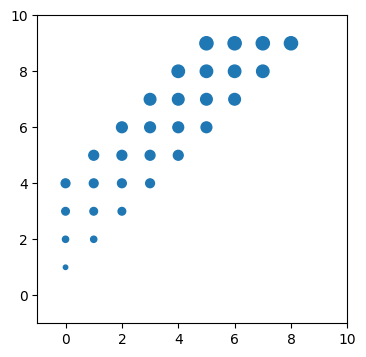

In [528]:
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')
S = Synapses(G, G)
S.connect(condition='i < j and i > j-5', p=1)
# S.connect(condition='i != j', p=1)

plt.figure(figsize=(4, 4))
plt.scatter(S.i, S.j, s=[i*10 for i in S.j])
# oh whatever
xlim(-1, len(S.source))
ylim(-1, len(S.target));

In [15]:
v_rest = -70 * mV
v_reset = -65 * mV
threshold = -50 * mV
membrane_r = 10. * Mohm
refractory = 2.0 * ms
run_time = 200*ms

tmp = np.zeros((300, 1)) * amp
tmp[0:] = 3*namp
curr = TimedArray(tmp, dt=1. * ms)

eqs = '''
dv/dt = ( -(v - v_rest) + membrane_r * curr(t, 0) * I ) / tau : volt (unless refractory)
I : 1
tau : second
'''
start_scope()

poisson_input = PoissonGroup(N, rates=F)
G = NeuronGroup(
1, eqs, threshold='v > threshold', 
reset="v = v_reset", method="linear", refractory=0 * ms)

S = Synapses(poisson_input, G, 'w : 1', on_pre="v_post += w * mV")

S.connect()
S.w = '1'
mon = StateMonitor(G, 'v', record=True)
s_mon = SpikeMonitor(poisson_input)

run(100*ms)

WARNING    (string):25: RuntimeWarning: divide by zero encountered in divide
 [py.warnings]


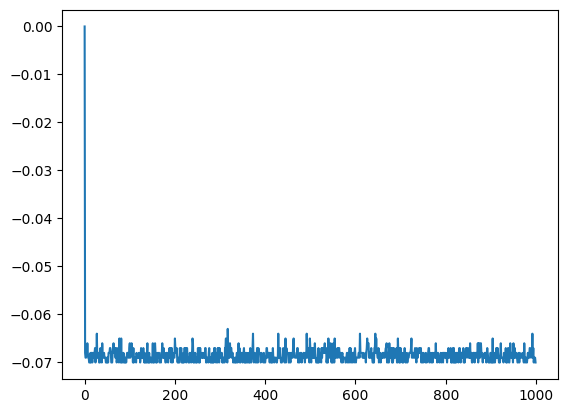

In [16]:
plot(mon.v[0])